# I. Load dataset

In [55]:
import pandas as pd
from tqdm import tqdm

def load_dataframe_parts(base_filename, num_parts):
    df_parts = []
    
    # Load each part and append to the list
    for i in tqdm(range(num_parts), desc=f'Loading {base_filename} from pickle', unit='file'):
        try:
            df_part = pd.read_pickle(f"/kaggle/input/retail/processed/processed/{base_filename}_part{i + 1}.pkl")
            df_parts.append(df_part)
        except FileNotFoundError:
            print(f"File not found: {base_filename}_part{i + 1}.pkl")
        except Exception as e:
            print(f"Error loading {base_filename}_part{i + 1}: {e}")
    
    # Concatenate all parts into a single DataFrame
    combined_df = pd.concat(df_parts, ignore_index=True)
    
    return combined_df

In [56]:
# Reload train_final_merged from 20 parts
train = load_dataframe_parts('train_final_merged', num_parts=20)

# Reload test_final_merged from 10 parts
test = load_dataframe_parts('test_final_merged', num_parts=10)

Loading test_final_merged from pickle: 100%|██████████| 10/10 [00:21<00:00,  2.19s/file]


In [57]:
train['revenue']=train['sales']*train['sell_price']
test['revenue']=test['sales']*test['sell_price']

# II. EDA

In [4]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,revenue
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,0.46,5.52
1,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,1.56,3.12
2,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,3.17,0.00
3,HOBBIES_1_012_CA_1_evaluation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,5.98,0.00
4,HOBBIES_1_015_CA_1_evaluation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,0.70,2.80


In [5]:
test.head()

,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,revenue
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,Sunday,4,2015,no_event,no_event,no_event,no_event,8.26,0.00
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,Sunday,4,2015,no_event,no_event,no_event,no_event,3.97,0.00
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,Sunday,4,2015,no_event,no_event,no_event,no_event,2.97,0.00
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,4,2015-04-19,11512,Sunday,4,2015,no_event,no_event,no_event,no_event,4.64,18.56
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,3,2015-04-19,11512,Sunday,4,2015,no_event,no_event,no_event,no_event,2.88,8.64


In [58]:
# Sort the DataFrame by date 
train = train.sort_values(by='date').reset_index(drop=True)
test = test.sort_values(by='date').reset_index(drop=True)

In [59]:
train['day'] = train['date'].dt.day
test['day'] = test['date'].dt.day

In [60]:
import json
# Extract unique values for the specified columns
unique_values = {
    'item_id': train['item_id'].unique().tolist(),
    'store_id': train['store_id'].unique().tolist(),
    'dept_id': train['dept_id'].unique().tolist(),
    'cat_id': train['cat_id'].unique().tolist(),
    'state_id': train['state_id'].unique().tolist()
}

# Save unique values to a JSON file
with open('/kaggle/working/id_values.json', 'w') as json_file:
    json.dump(unique_values, json_file, indent=4)

In [61]:
train_df=train[['item_id', 'store_id', 'dept_id', 'cat_id', 'state_id', 'day','month','year','revenue']]
test_df=test[['item_id', 'store_id', 'dept_id', 'cat_id', 'state_id', 'day','month','year','revenue']]

In [10]:
train_df.head()

,item_id,store_id,dept_id,cat_id,state_id,day,month,year,revenue
0,HOBBIES_1_008,CA_1,HOBBIES_1,HOBBIES,CA,29,1,2011,5.52
1,HOUSEHOLD_2_191,TX_3,HOUSEHOLD_2,HOUSEHOLD,TX,29,1,2011,0.00
2,HOUSEHOLD_2_193,TX_3,HOUSEHOLD_2,HOUSEHOLD,TX,29,1,2011,0.00
3,HOUSEHOLD_2_197,TX_3,HOUSEHOLD_2,HOUSEHOLD,TX,29,1,2011,3.97
4,HOUSEHOLD_2_198,TX_3,HOUSEHOLD_2,HOUSEHOLD,TX,29,1,2011,0.00


In [11]:
test_df.head()

,item_id,store_id,dept_id,cat_id,state_id,day,month,year,revenue
0,HOBBIES_1_001,CA_1,HOBBIES_1,HOBBIES,CA,19,4,2015,0.00
1,FOODS_2_307,TX_3,FOODS_2,FOODS,TX,19,4,2015,0.00
2,FOODS_2_306,TX_3,FOODS_2,FOODS,TX,19,4,2015,0.00
3,FOODS_2_305,TX_3,FOODS_2,FOODS,TX,19,4,2015,26.88
4,FOODS_2_304,TX_3,FOODS_2,FOODS,TX,19,4,2015,3.97


In [62]:
train_df=train_df[train_df['revenue']>0]
test_df=test_df[test_df['revenue']>0]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


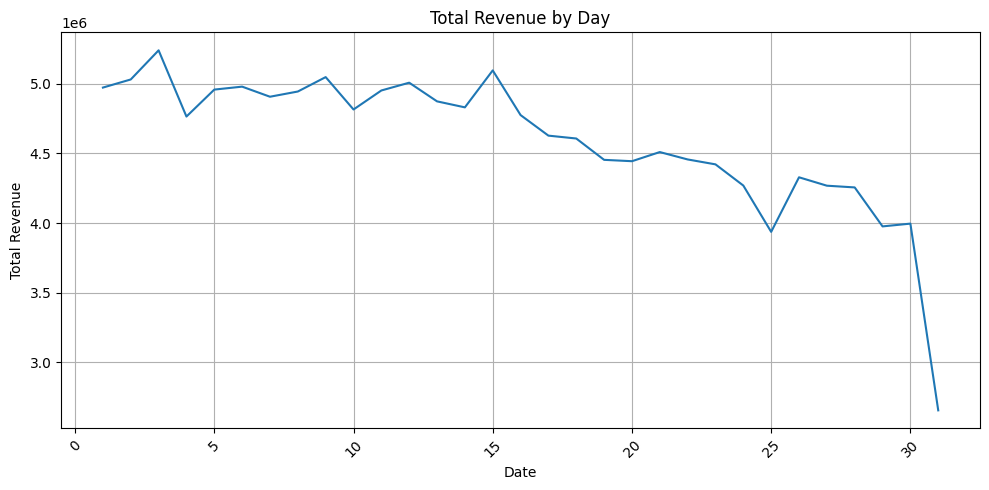

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and sum the revenue
revenue_by_date = train_df.groupby('day')['revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=revenue_by_date, x='day', y='revenue')
plt.title('Total Revenue by Day')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

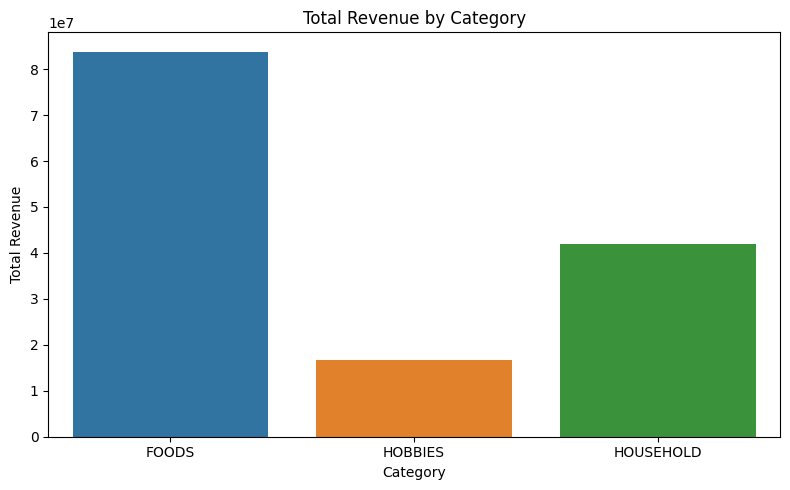

In [14]:
# Group by category and sum the revenue
revenue_by_category = train_df.groupby('cat_id')['revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_category, x='cat_id', y='revenue')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

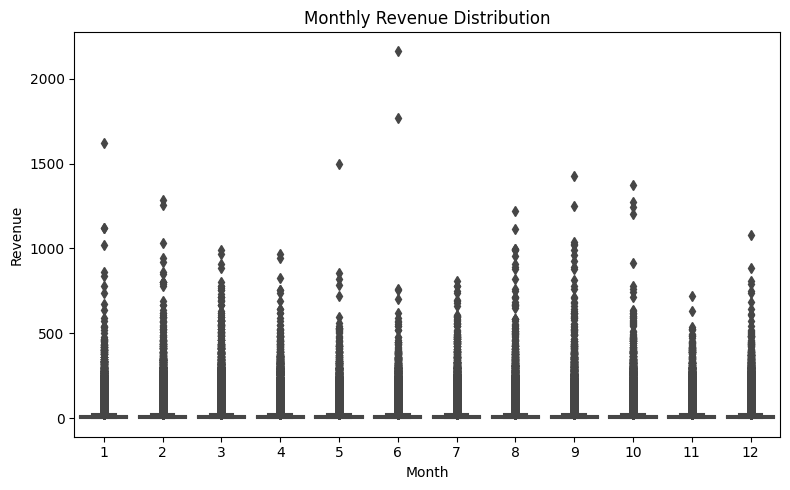

In [15]:
# Create a boxplot for daily revenue
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='month', y='revenue')
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
item_encoder = LabelEncoder()

# Encoding categorical columns
train_df['item_id'] = item_encoder.fit_transform(train_df['item_id'])
test_df['item_id'] = item_encoder.transform(test_df['item_id'])

In [64]:
# Initialize the LabelEncoder
store_encoder = LabelEncoder()

# Encoding categorical columns
train_df['store_id'] = store_encoder.fit_transform(train_df['store_id'])
test_df['store_id'] = store_encoder.transform(test_df['store_id'])

In [65]:
# Initialize the LabelEncoder
state_encoder = LabelEncoder()

# Encoding categorical columns
train_df['state_id'] = state_encoder.fit_transform(train_df['state_id'])
test_df['state_id'] = state_encoder.transform(test_df['state_id'])

In [66]:
# Initialize the LabelEncoder
cat_id_encoder = LabelEncoder()

# Encoding categorical columns
train_df['cat_id'] = cat_id_encoder.fit_transform(train_df['cat_id'])
test_df['cat_id'] = cat_id_encoder.transform(test_df['cat_id'])

In [67]:
# Initialize the LabelEncoder
dept_id_encoder = LabelEncoder()

# Encoding categorical columns
train_df['dept_id'] = dept_id_encoder.fit_transform(train_df['dept_id'])
test_df['dept_id'] = dept_id_encoder.transform(test_df['dept_id'])

In [111]:
import pickle
# Save the encoder
with open('item_encoder.pkl', 'wb') as f:
    pickle.dump(item_encoder, f)

with open('store_encoder.pkl', 'wb') as f:
    pickle.dump(store_encoder, f)

with open('state_encoder.pkl', 'wb') as f:
    pickle.dump(state_encoder, f)

with open('cat_id.pkl', 'wb') as f:
    pickle.dump(cat_id_encoder, f)

with open('dept_id_encoder.pkl', 'wb') as f:
    pickle.dump(dept_id_encoder, f)

In [69]:
import pandas as pd

# Calculate the number of rows for the validation set (35% of train_df)
num_val_rows = int(len(train_df) * 0.35)

# Create validation set from the first 35% of the train_df
val_set = train_df.iloc[:num_val_rows]

# Create training set from the remaining 65% of the train_df
train_set = train_df.iloc[num_val_rows:]

In [70]:
train_set.head()

,item_id,store_id,dept_id,cat_id,state_id,day,month,year,revenue
11249959,2299,7,5,2,2,12,11,2012,1.98
11249960,2298,7,5,2,2,12,11,2012,0.97
11249962,2296,7,5,2,2,12,11,2012,9.94
11249967,2287,7,5,2,2,12,11,2012,6.98
11249968,2286,7,5,2,2,12,11,2012,7.52


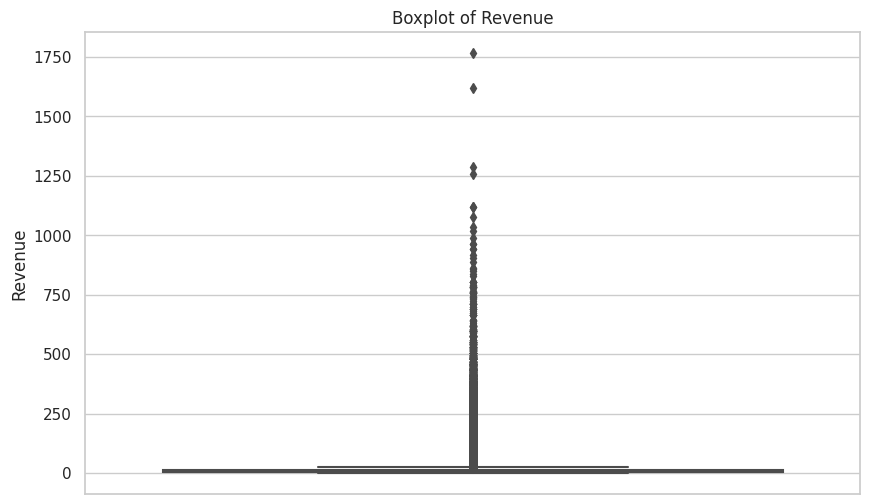

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=train_set['revenue'])
plt.title('Boxplot of Revenue')
plt.ylabel('Revenue')
plt.show()

In [71]:
from scipy.stats.mstats import winsorize
import numpy as np

# Winsorize the revenue data, limiting the top and bottom 1% of data
train_set['revenue'] = winsorize(train_set['revenue'], limits=[0.01, 0.01])

# Apply log transformation to the Winsorized data (adding 1 to avoid log(0))
train_set['revenue'] = np.log1p(train_set['revenue'])

/tmp/ipykernel_30/3901868217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['revenue'] = winsorize(train_set['revenue'], limits=[0.01, 0.01])
/tmp/ipykernel_30/3901868217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['revenue'] = np.log1p(train_set['revenue'])


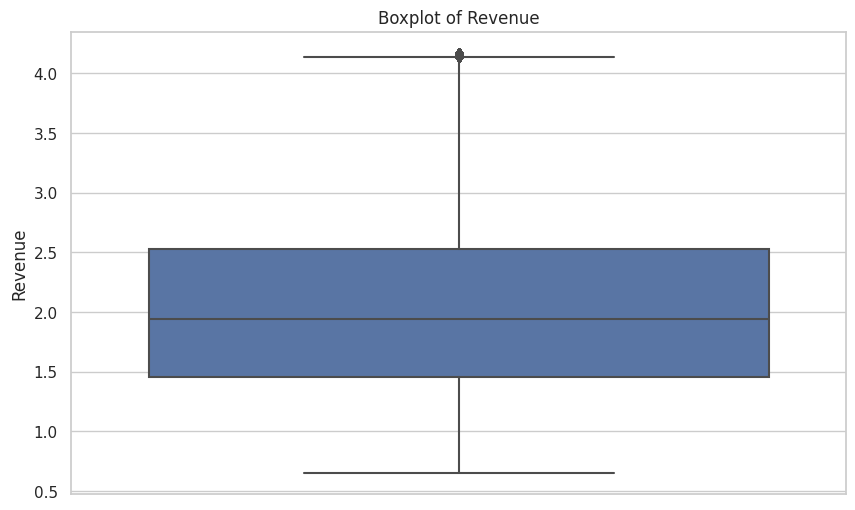

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=train_set['revenue'])
plt.title('Boxplot of Revenue')
plt.ylabel('Revenue')
plt.show()

In [72]:
from scipy.stats.mstats import winsorize
import numpy as np

# Winsorize the revenue data, limiting the top and bottom 1% of data
test['revenue'] = winsorize(test['revenue'], limits=[0.01, 0.01])

# Apply log transformation to the Winsorized data (adding 1 to avoid log(0))
test['revenue'] = np.log1p(test['revenue'])

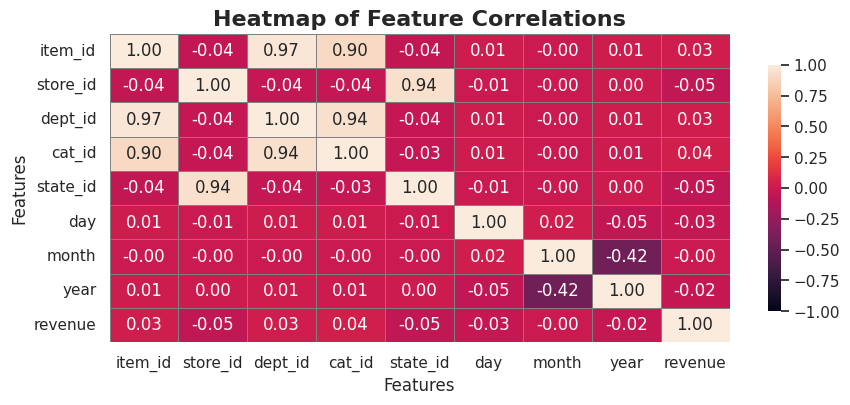

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="darkgrid")

# Create the heatmap
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(train_set.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f", 
    cbar_kws={"shrink": .8},linewidths=0.5,linecolor='gray')

# Customize title and axis labels
plt.title("Heatmap of Feature Correlations", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the heatmap
plt.show()

# III. Splitting 

In [73]:
import numpy as np
X_train = train_set.drop('revenue',axis=1)
X_val = val_set.drop('revenue',axis=1)
X_test = test_df.drop('revenue',axis=1)
y_train = train_set['revenue']
y_val = val_set['revenue']
y_test = test_df['revenue']

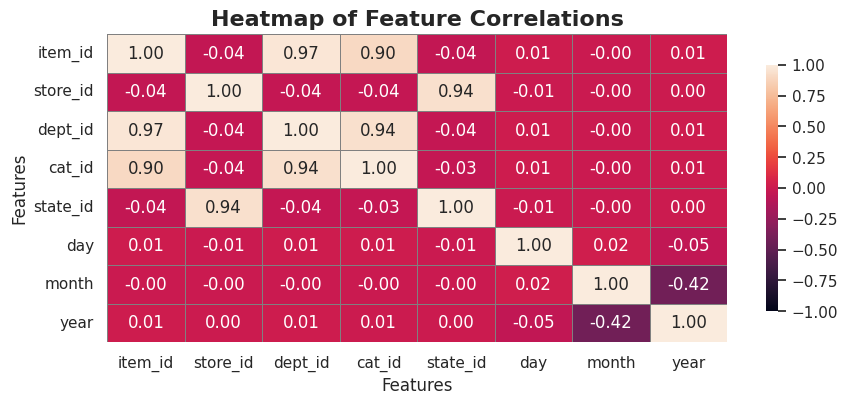

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="darkgrid")

# Create the heatmap
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(X_train.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f", 
    cbar_kws={"shrink": .8},linewidths=0.5,linecolor='gray')

# Customize title and axis labels
plt.title("Heatmap of Feature Correlations", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the heatmap
plt.show()

# IV. Baseline model

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate the mean of the training target variable
mean_revenue = np.mean(y_train)

# Create baseline predictions (mean revenue)
y_train_baseline_preds = np.full(y_train.shape, mean_revenue)

# Calculate MSE and MAE for the baseline model
mse_baseline = mean_squared_error(y_train, y_train_baseline_preds)
mae_baseline = mean_absolute_error(y_train, y_train_baseline_preds)

print(f'Baseline Model Mean Squared Error: {mse_baseline:.2f}')
print(f'Baseline Model Mean Absolute Error: {mae_baseline:.2f}')

Baseline Model Mean Squared Error: 0.58
Baseline Model Mean Absolute Error: 0.61


# V. Train LGBM Model

In [26]:
from sklearn.metrics import mean_squared_error

In [21]:
from src.preparation import PredictiveModel

In [76]:
import pandas as pd
from lightgbm import LGBMRegressor  # Import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import altair as alt
import gc  # For garbage collection
import pickle  # Import pickle for saving models
from sklearn.preprocessing import StandardScaler


In [77]:
# Create an instance of the PredictiveModel
model = PredictiveModel()

In [78]:
# Scale the features
X_train_scaled = model.scale_features(X_train)
X_val_scaled = model.scaler.transform(X_val)  # Transform validation data
X_test_scaled = model.scaler.transform(X_test)  # Transform test data

In [79]:
# Save the scaler for later predictions
model.save_scaler('scaler.pkl')  # Save the scaler

Scaler saved successfully.


In [80]:
# Set the custom LGBMRegressor hyperparameters
model.train(X_train_scaled, y_train)

Training Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.494125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 9090059, number of used features: 8
[LightGBM] [Info] Start training from score 2.033426


Training Epochs: 100%|██████████| 1/1 [11:28<00:00, 688.06s/it]


LGBMRegressor(max_depth=12, min_child_samples=16, min_data_in_leaf=20,
              n_estimators=1000)

In [81]:
import pickle
model.save_model('predictive_lgbm.pkl')

In [82]:
# Prediction on training set
y_train_preds=model.predict(X_train_scaled)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [83]:
# Calculate and display MSE and MAE for training set
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model
mse_train,mae_train = model.evaluate(y_train, y_train_preds)

print(f'Training Mean Squared Error: {mse_train:.2f}')
print(f'Training Mean Absolute Error: {mae_train:.2f}')

Training Mean Squared Error: 0.50
Training Mean Absolute Error: 0.57


In [84]:
# Prediction on validation set
y_val_preds=model.predict(X_val)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [85]:
# Evaluate the model
mse_val,mae_val = model.evaluate(y_val, y_val_preds)

print(f'Validation Mean Squared Error: {mse_val:.2f}')
print(f'Validation Mean Absolute Error: {mae_val:.2f}')

Validation Mean Squared Error: 309.37
Validation Mean Absolute Error: 8.86


In [86]:
# Prediction on validation set
y_test_preds=model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [87]:
# Evaluate the model
mse_test,mae_test = model.evaluate(y_test, y_test_preds)

print(f'Testing Mean Squared Error: {mse_val:.2f}')
print(f'Testing Mean Absolute Error: {mae_val:.2f}')

Testing Mean Squared Error: 309.37
Testing Mean Absolute Error: 8.86


In [40]:
import altair as alt

In [48]:
pip install "vegafusion[embed]>=1.5.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 4.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 6.9 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [88]:
train_prediction_df = model.create_prediction_df(y_train, y_train_preds)
test_prediction_df = model.create_prediction_df(y_test, y_test_preds)
val_prediction_df = model.create_prediction_df(y_val, y_val_preds)

In [89]:
# Visualize predictions
train_scatter_plot = model.visualize_predictions(train_prediction_df)
train_scatter_plot.display() 

alt.LayerChart(...)

In [90]:
# Visualize predictions
val_scatter_plot = model.visualize_predictions(val_prediction_df)
val_scatter_plot.display() 

alt.LayerChart(...)

In [91]:
# Visualize predictions
test_scatter_plot = model.visualize_predictions(test_prediction_df)
test_scatter_plot.display() 

alt.LayerChart(...)

In [92]:
X_train

,item_id,store_id,dept_id,cat_id,state_id,day,month,year
11249959,2299,7,5,2,2,12,11,2012
11249960,2298,7,5,2,2,12,11,2012
11249962,2296,7,5,2,2,12,11,2012
11249967,2287,7,5,2,2,12,11,2012
11249968,2286,7,5,2,2,12,11,2012
...,...,...,...,...,...,...,...,...
34720670,2631,3,6,2,0,18,4,2015
34720672,2629,3,6,2,0,18,4,2015
34720683,2618,3,6,2,0,18,4,2015
34720687,2614,3,6,2,0,18,4,2015


item_id	store_id	dept_id	cat_id	state_id	day	month	year	revenue
0	HOBBIES_1_001	CA_1	HOBBIES_1	HOBBIES	CA	19	4	2015	0.00
1	FOODS_2_307	TX_3	FOODS_2	FOODS	TX	19	4	2015	0.00
2	FOODS_2_306	TX_3	FOODS_2	FOODS	TX	19	4	2015	0.00
3	FOODS_2_305	TX_3	FOODS_2	FOODS	TX	19	4	2015	26.88
4	FOODS_2_304	TX_3	FOODS_2	FOODS	TX	19	4	2015	3.97


In [96]:
state_encoder

LabelEncoder()

In [118]:
import pandas as pd
import pickle
import numpy as np

# Load the encoders and scaler
with open('/kaggle/working/item_encoder.pkl', 'rb') as f:
    item_encoder = pickle.load(f)

with open('/kaggle/working/store_encoder.pkl', 'rb') as f:
    store_encoder = pickle.load(f)

with open('/kaggle/working/state_encoder.pkl', 'rb') as f:
    state_encoder = pickle.load(f)

with open('/kaggle/working/cat_id.pkl', 'rb') as f:
    cat_id_encoder = pickle.load(f)

with open('/kaggle/working/dept_id_encoder.pkl', 'rb') as f:
    dept_id_encoder = pickle.load(f)

with open('/kaggle/working/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Example new input data (replace with actual new data)
new_input_data = pd.DataFrame({
    'item_id': ['FOODS_2_304'],
    'store_id': ['TX_3'],
    'state_id': ['TX'],
    'cat_id': ['FOODS'],
    'dept_id': ['FOODS_2'],
    'day': [5],
    'month': [10],
    'year': [2026]
})

# Function to safely transform categorical columns
def safe_transform(encoder, data):
    try:
        return encoder.transform(data)
    except ValueError as e:
        print(f"Warning: {e}")
        # Optionally handle unseen categories here (e.g., return a default value or np.nan)
        return np.full(data.shape, -1)  # Replace unseen categories with -1

# Encode categorical columns using the loaded encoders
new_input_data['item_id'] = safe_transform(item_encoder, new_input_data['item_id'])
new_input_data['store_id'] = safe_transform(store_encoder, new_input_data['store_id'])
new_input_data['state_id'] = safe_transform(state_encoder, new_input_data['state_id'])
new_input_data['cat_id'] = safe_transform(cat_id_encoder, new_input_data['cat_id'])
new_input_data['dept_id'] = safe_transform(dept_id_encoder, new_input_data['dept_id'])

# Select numerical columns
numerical_columns = ['item_id', 'store_id', 'dept_id', 'cat_id', 'state_id', 'day', 'month', 'year']

# Scale numerical features using the loaded scaler
new_input_data[numerical_columns] = scaler.transform(new_input_data[numerical_columns])

# Make predictions using the preprocessed input data
predictions = model.predict(new_input_data)

# Output predictions
print("Predictions:", np.expm1(float(predictions[0])))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Predictions: 7.362850508706834
